**Datos**

Se ha observado que las ventas de un artículo en particular son 450, 475 ó 500, artículos por semana con probabilidades de 0,25; 0,40; y 0,35 respectivamente. Los tiempos de anticipación entre hacer y recibir un pedido son de 1, 2, y 3 semanas con probabilidades de 0,75; 0,20 y 0,05 respectivamente. Usando los datos mostrados a continuación, determinar las existencias disponibles después de 15 semanas de operación simulada.
Cantidad constante de pedidos = 1,400 artículos

Punto de Pedido = 500 unidades

Nivel inicial de pedidos = 1,400

Costo de Ordenar = 25

Costo de mantenimiento = 15

Costo por faltante = 10

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datos = pd.read_table('aqui tu csv o txt')

datos

,ventas,probabilidad
0,450,0.25
1,475,0.40
2,500,0.35


In [39]:
demanda = datos.filter(items=["ventas", "probabilidad"])
demanda.head()

,ventas,probabilidad
0,450,0.25
1,475,0.40
2,500,0.35


In [40]:
demandas = demanda.groupby("ventas")

In [37]:
demandas.sum()

,probabilidad
ventas,
450,0.25
475,0.40
500,0.35


In [25]:
demandas.mean()

,probabilidad
ventas,
450,0.25
475,0.40
500,0.35


In [26]:
tot = demandas.mean()
tot

,probabilidad
ventas,
450,0.25
475,0.40
500,0.35


In [27]:
# Ordenamos por Día
suma = tot['probabilidad'].sum()
n=len(tot)
suma
x1 = tot.assign(Probabilidad=lambda x: x['probabilidad'] / suma)
x2 = x1.sort_values('ventas')
a=x2['probabilidad']
a

ventas
450    0.25
475    0.40
500    0.35
Name: probabilidad, dtype: float64

In [28]:
a1= np.cumsum(a) #Cálculo la suma acumulativa de las probabilidades
x2['FPA'] =a1
x2

,probabilidad,Probabilidad,FPA
ventas,,,
450,0.25,0.25,0.25
475,0.40,0.40,0.65
500,0.35,0.35,1.00


In [29]:
x2['Min'] = x2['FPA']
x2['Max'] = x2['FPA']
x2

,probabilidad,Probabilidad,FPA,Min,Max
ventas,,,,,
450,0.25,0.25,0.25,0.25,0.25
475,0.40,0.40,0.65,0.65,0.65
500,0.35,0.35,1.00,1.00,1.00


In [30]:
lis = x2["Min"].values
lis2 = x2['Max'].values
lis[0]= 0
for i in range(1,3):
    lis[i] = lis2[i-1]
    print(i,i-1)
x2['Min'] = lis
x2

1 0
2 1


,probabilidad,Probabilidad,FPA,Min,Max
ventas,,,,,
450,0.25,0.25,0.25,0.00,0.25
475,0.40,0.40,0.65,0.25,0.65
500,0.35,0.35,1.00,0.65,1.00


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datos = pd.read_table('aqui tu csv o txt de tus intervalos creo xd')

datos

,semanas,probabilidad
0,1,0.75
1,2,0.20
2,3,0.05


In [43]:
demanda = datos.filter(items=["semanas", "probabilidad"])
demanda.head()

,semanas,probabilidad
0,1,0.75
1,2,0.20
2,3,0.05


In [44]:
demandas = demanda.groupby("semanas")

In [45]:
demandas.sum()

,probabilidad
semanas,
1,0.75
2,0.20
3,0.05


In [46]:
demandas.mean()

,probabilidad
semanas,
1,0.75
2,0.20
3,0.05


In [47]:
tot = demandas.mean()
tot

,probabilidad
semanas,
1,0.75
2,0.20
3,0.05


In [49]:
# Ordenamos por Día
suma = tot['probabilidad'].sum()
n=len(tot)
suma
x1 = tot.assign(Probabilidad=lambda x: x['probabilidad'] / suma)
x2 = x1.sort_values('semanas')
a=x2['probabilidad']
a

semanas
1    0.75
2    0.20
3    0.05
Name: probabilidad, dtype: float64

In [50]:
a1= np.cumsum(a) #Cálculo la suma acumulativa de las probabilidades
x2['FPA'] =a1
x2

,probabilidad,Probabilidad,FPA
semanas,,,
1,0.75,0.75,0.75
2,0.20,0.20,0.95
3,0.05,0.05,1.00


In [51]:
x2['Min'] = x2['FPA']
x2['Max'] = x2['FPA']
x2

,probabilidad,Probabilidad,FPA,Min,Max
semanas,,,,,
1,0.75,0.75,0.75,0.75,0.75
2,0.20,0.20,0.95,0.95,0.95
3,0.05,0.05,1.00,1.00,1.00


In [52]:
lis = x2["Min"].values
lis2 = x2['Max'].values
lis[0]= 0
for i in range(1,3):
    lis[i] = lis2[i-1]
    print(i,i-1)
x2['Min'] = lis
x2

1 0
2 1


,probabilidad,Probabilidad,FPA,Min,Max
semanas,,,,,
1,0.75,0.75,0.75,0.00,0.75
2,0.20,0.20,0.95,0.75,0.95
3,0.05,0.05,1.00,0.95,1.00


In [68]:
#Programa para calcular el modelo EOQ
from math import sqrt
import pandas as pd
import numpy as np
# D = Demanda
# Co = Costo de ordenar
# Ch = Costo de Mantenimiento
# P = Costo del Producto: precio por unidad de articulo
# Q = Cantidad optima de pedido
# MO(Q)=Costo Mínimo total
# N= número de pedidos
# T=tiempo entre pedido
# ChT= Costo anual de mantener
# CoT = Costo anual de ordenar
# MO(Q) = Costo total de Inventario
D = 21000.00
Co = 25.00
Ch = 15.00
P = 2.50
Tespera = 21
DiasAno = 105
Q = round(sqrt(((2*Co*D)/Ch)),2)
N = round(D / Q,2)
R = round((D / DiasAno) * Tespera,2)
T = round(DiasAno / N,2)
CoT = N * Co
ChT = round(Q / 2 * Ch,2)
MOQ = round(CoT + ChT,2)
CTT = round(P * D + MOQ,2)
print("Cantidad Optima de Pedido Q = ",Q)
print("Costo total de Ordenar CoT =", CoT)
print("Costo total de Mantener Inventario ChT =", ChT)
print("Costo Total de Ordenar y Mantener Inventario MO(O)", MOQ)
print("Costo Total del Sistema de Inventario CTT", CTT)
print("Número total de pedidos",N)
print("Punto de reorden = R",R)
print("Tiempo de Pedido",T)

Cantidad Optima de Pedido Q =  264.58
Costo total de Ordenar CoT = 1984.25
Costo total de Mantener Inventario ChT = 1984.35
Costo Total de Ordenar y Mantener Inventario MO(O) 3968.6
Costo Total del Sistema de Inventario CTT 56468.6
Número total de pedidos 79.37
Punto de reorden = R 4200.0
Tiempo de Pedido 1.32


In [69]:
# Programa para generar el gráfico de costo mínimo
indice = ['Q','Costo_ordenar','Costo_Mantenimiento','Costo_total','Diferencia_Costo_Total']
# Generamos una lista ordenada de valores de Q
from pandas import DataFrame
import numpy as np
import matplotlib as plt
periodo = np.arange(1,19)
def genera_lista(Q):
    n=18
    Q_Lista = []
    i=1
    Qi = Q
    Q_Lista.append(Qi)
    for i in range(1,9):
        Qi = Qi - 60
        Q_Lista.append(Qi)
 
    Qi = Q
    for i in range(9, n):
        Qi = Qi + 60
        Q_Lista.append(Qi)
 
    return Q_Lista
Lista= genera_lista(Q)
Lista.sort()
dfQ = DataFrame(index=periodo, columns=indice).fillna(0)
dfQ['Q'] = Lista
#dfQ
for period in periodo:
    dfQ['Costo_ordenar'][period] = D * Co / dfQ['Q'][period]
    dfQ['Costo_Mantenimiento'][period] = dfQ['Q'][period] * Ch / 2
    dfQ['Costo_total'][period] = dfQ['Costo_ordenar'][period] + dfQ['Costo_Mantenimiento'][period]
    dfQ['Diferencia_Costo_Total'][period] = dfQ['Costo_total'][period] - MOQ
dfQ


<ipython-input-69-cc0d790644fb>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQ['Costo_ordenar'][period] = D * Co / dfQ['Q'][period]
<ipython-input-69-cc0d790644fb>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQ['Costo_Mantenimiento'][period] = dfQ['Q'][period] * Ch / 2
<ipython-input-69-cc0d790644fb>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQ['Costo_total'][period] = dfQ['Costo_ordenar'][period] + dfQ['Costo_Ma

,Q,Costo_ordenar,Costo_Mantenimiento,Costo_total,Diferencia_Costo_Total
1,-215.42,-2437,-1615,-4052,-8020
2,-155.42,-3377,-1165,-4542,-8510
3,-95.42,-5501,-715,-6216,-10184
4,-35.42,-14822,-265,-15087,-19055
5,24.58,21358,184,21542,17573
6,84.58,6207,634,6841,2872
7,144.58,3631,1084,4715,746
8,204.58,2566,1534,4100,131
9,264.58,1984,1984,3968,0
10,324.58,1617,2434,4051,82


<AxesSubplot:>

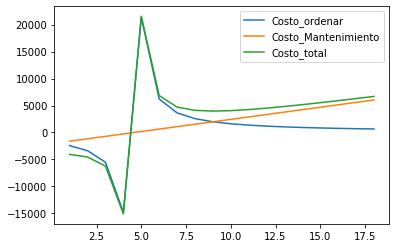

In [62]:
dfG = dfQ.loc[:,'Costo_ordenar':'Costo_total']
dfG
dfG.plot()